# TEST NOTEBOOK

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
from utils import ROOT_DIR, plot_series

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
ROOT_DIR

'/Users/asp/Documents/!!!Python/TimeSeries'

READ DATA

In [5]:
data = pd.read_excel(ROOT_DIR + '/data/Historico acciones.xlsx')

In [6]:
data.head()

,Nemotecnico,Date,Quantity,$ Volum,Close price,Max price,Avg. Price,Min Price,variat,$ variat
0,PFBCOLOM,2020-10-09,159771,4.038280e+09,25300.0,25300.0,25275.43,25150.0,0.0048,120.0
1,PFBCOLOM,2020-10-13,1004966,2.465825e+10,24580.0,25200.0,24536.40,24310.0,-0.0285,-720.0
2,PFBCOLOM,2020-10-14,958577,2.338765e+10,24760.0,24760.0,24398.30,24020.0,0.0073,180.0
3,PFBCOLOM,2020-10-15,651960,1.593465e+10,24400.0,24570.0,24441.14,24300.0,-0.0145,-360.0
4,PFBCOLOM,2020-10-16,358315,8.836055e+09,24730.0,24750.0,24660.02,24300.0,0.0135,330.0


In [7]:
data.describe()

,Quantity,$ Volum,Close price,Max price,Avg. Price,Min Price,variat,$ variat
count,3.094000e+03,3.094000e+03,3094.00000,3094.000000,3094.000000,3094.00000,3094.000000,3094.000000
mean,9.528060e+05,4.455778e+09,15997.93775,15857.136522,15900.386697,15539.73956,0.018579,13.807886
std,3.351664e+06,9.171985e+09,16111.15277,16233.802105,16083.443958,15923.72737,0.751177,394.067522
min,0.000000e+00,0.000000e+00,193.10000,0.000000,0.000000,0.00000,-7.890000,-2460.000000
25%,3.383350e+04,2.544954e+08,4300.00000,4140.000000,4219.087500,4090.00000,-0.008775,-60.000000
50%,1.255985e+05,1.266830e+09,10820.00000,10700.000000,10776.205000,10600.00000,0.000000,0.000000
75%,4.048372e+05,4.798388e+09,24327.50000,24552.500000,24340.827500,24000.00000,0.011300,85.000000
max,8.864471e+07,2.245649e+11,83400.00000,83400.000000,83097.080000,81950.00000,8.090000,4800.000000


In [8]:
data.sort_values('Date', inplace = True)

# BASELINE

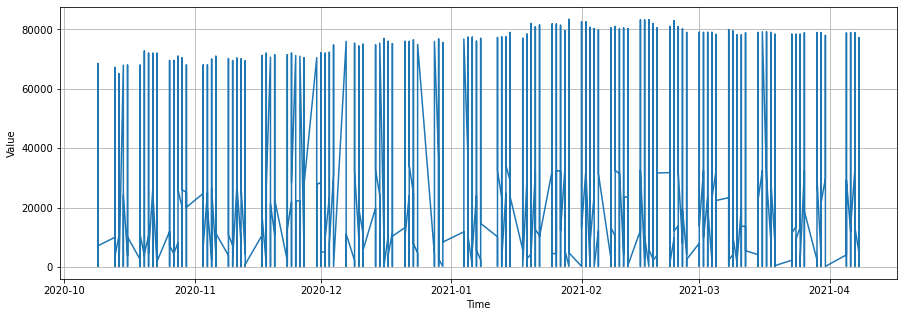

In [9]:
plot_series(data['Date'], data['Close price'])

In [25]:
df = data[['Date', 'Close price']]
df.index = df['Date']
df = df.drop('Date', axis = 1)

<AxesSubplot:xlabel='Date'>

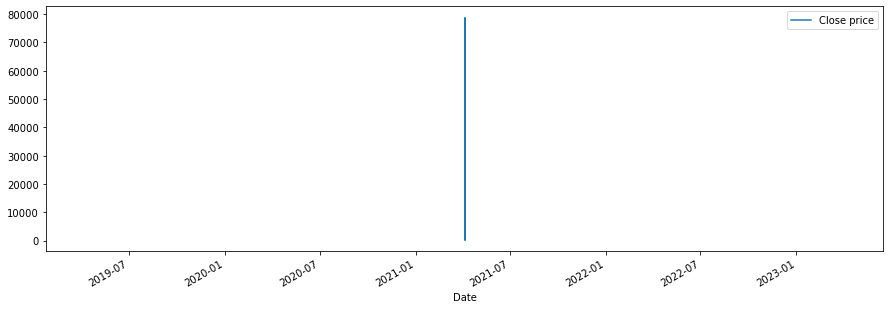

In [38]:
df['2021-04-05':'2021-04-05'].plot(figsize = (15, 5))

- there is no time in the data
- if agregate closing price with mean for each day there are not enought data (only 119 rows/days)
- for test case I will remove weekends and gaps between dates and assume that each datapoint is one tieme stamp and all timestamps is made with equal distance. 

In [39]:
temp = df['2021-04-05':'2021-04-05']

In [42]:
temp.index = range(temp.shape[0])

<AxesSubplot:>

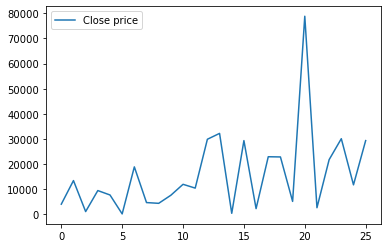

In [43]:
temp.plot()

In [44]:
temp.shape

(26, 1)

In [46]:
df.index[0]

Timestamp('2020-10-09 00:00:00')

In [47]:
df.index[1]

Timestamp('2020-10-09 00:00:00')

In [48]:
df.index[2]

Timestamp('2020-10-09 00:00:00')

In [50]:
df.groupby(df.index).mean()

,Close price
Date,
2020-10-09,14363.823077
2020-10-13,14115.715385
2020-10-14,14053.157692
2020-10-15,14041.153846
2020-10-16,14116.403846
...,...
2021-03-31,15815.634615
2021-04-05,15930.942308
2021-04-06,15960.865385


In [51]:
df.shape

(3094, 1)